Gender -> Whether the customer is a male or a female

SeniorCitizen -> Whether the customer is a senior citizen or not (1, 0)

Partner -> Whether the customer has a partner or not (Yes, No)

Dependents -> Whether the customer has dependents or not (Yes, No)

Tenure -> Number of months the customer has stayed with the company

PhoneService -> Whether the customer has a phone service or not (Yes, No)

MultipleLines -> Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService -> Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity -> Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup -> Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection -> Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -> Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV -> Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -> Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract -> The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling -> Whether the customer has paperless billing or not (Yes, No)

PaymentMethod -> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)

MonthlyCharges -> The amount charged to the customer monthly

TotalCharges -> The total amount charged to the customer

Churn -> Whether the customer churned or not (Yes or No)

In [ ]:
# import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

# rawdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# rawdata.head()

In [1]:
import pandas as pd
import numpy as np

rawdata = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

rawdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
rawdata['TotalCharges'] = pd.to_numeric(rawdata['TotalCharges'].str.strip().replace('', 'NaN'), errors='coerce')
rawdata['SeniorCitizen'] = rawdata['SeniorCitizen'].astype(object)
rawdata = rawdata.drop(columns=['customerID'])

In [4]:
rawdata.info() #missing values in TotalCharges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
unique_values = {}
cat_features = rawdata.select_dtypes(exclude=['number']).columns

for feature in cat_features:
    unique_values[feature] = rawdata[feature].unique()
    #unique_values[feature] = rawdata[feature].value_counts()

unique_values

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'Paym

In [6]:
rawdata.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [7]:
nan_rows = rawdata[rawdata['TotalCharges'].isna()]
nan_rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
rawdata = rawdata[~rawdata['TotalCharges'].isna()]
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

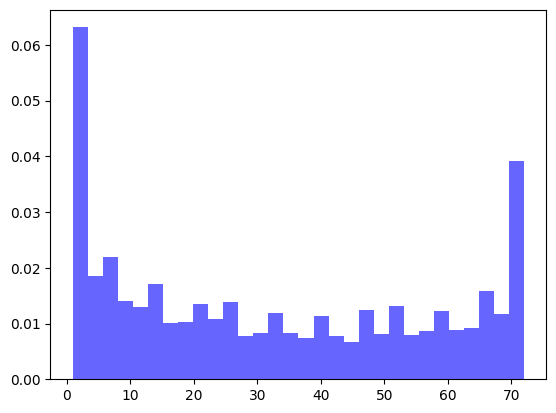

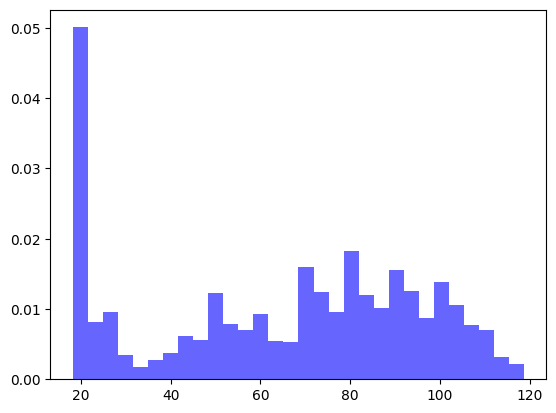

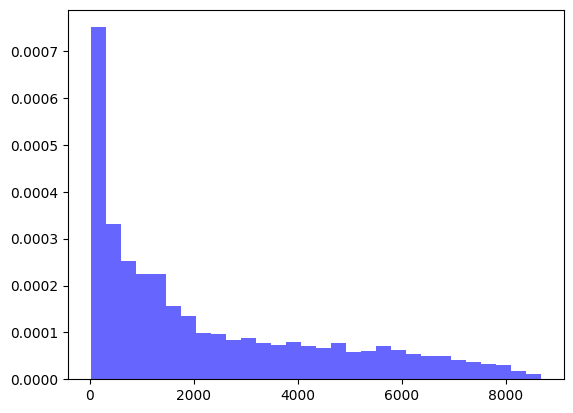

In [9]:
import matplotlib.pyplot as plt

plt.hist(rawdata['tenure'], bins=30, density=True, alpha=0.6, color='b')
plt.show()
plt.hist(rawdata['MonthlyCharges'], bins=30, density=True, alpha=0.6, color='b')
plt.show()
plt.hist(rawdata['TotalCharges'], bins=30, density=True, alpha=0.6, color='b')
plt.show()

In [10]:
all_data = rawdata.copy()

data = all_data.drop(columns=['Churn'])
target = all_data['Churn']

print(f'Size of data: {data.shape}; Size of target: {target.shape}')

Size of data: (7032, 19); Size of target: (7032,)


In [11]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4922, 19)
y_train shape: (4922,)
X_test shape: (2110, 19)
y_test shape: (2110,)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# enc_features = X_train.select_dtypes(exclude=['number']).columns

# encoder = OneHotEncoder(sparse_output=False, drop='first')
# encoder.fit(X_train[enc_features])

# X_train_enc = encoder.transform(X_train[enc_features])
# X_test_enc = encoder.transform(X_test[enc_features])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# std_features = X_train.select_dtypes(include=['number']).columns

# scaler = StandardScaler()
# scaler.fit(X_train[std_features])

# X_train_std = scaler.transform(X_train[std_features])
# X_test_std = scaler.transform(X_test[std_features])

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

enc_features = X_train.select_dtypes(exclude=['number']).columns
std_features = X_train.select_dtypes(include=['number']).columns

pipeline = ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), enc_features),
        ('standard', StandardScaler(), std_features)
    ])

X_train_prep = pipeline.fit_transform(X_train)
X_test_prep = pipeline.transform(X_test)

le = LabelEncoder()
y_train_prep = le.fit_transform(y_train)
y_test_prep = le.transform(y_test)

### Logistic regression



In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_prep, y_train_prep)

LogisticRegression()

### Prediction

In [15]:
prediction = log_reg.predict(X_test_prep)
prediction[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [16]:
probability = log_reg.predict_proba(X_test_prep)
probability[:10]

array([[0.9939933 , 0.0060067 ],
       [0.87285309, 0.12714691],
       [0.30965846, 0.69034154],
       [0.87443142, 0.12556858],
       [0.63214934, 0.36785066],
       [0.53384696, 0.46615304],
       [0.88307512, 0.11692488],
       [0.26047581, 0.73952419],
       [0.77677994, 0.22322006],
       [0.97992697, 0.02007303]])

### Evaluation

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

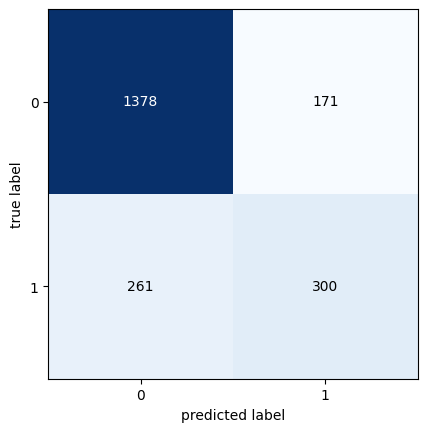

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

c_matrix = confusion_matrix(y_test_prep, prediction)
plot_confusion_matrix(c_matrix)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_prep, prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV

log_reg_grid = LogisticRegression()

param_grid = {
    'C': [1, 4, 7, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [50, 100, 200]
}

grid_search = GridSearchCV(log_reg_grid, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_prep, y_train_prep)

best_params_ = grid_search.best_params_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

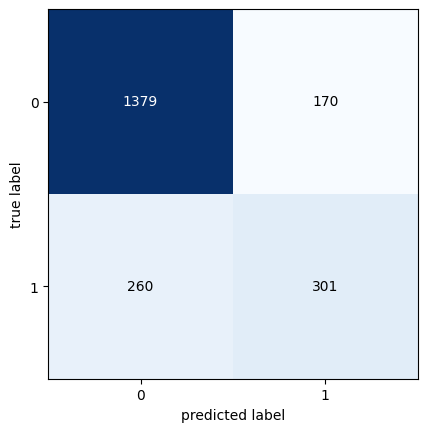

In [25]:
best_log_reg = LogisticRegression(
    C=best_params_['C'],
    penalty=best_params_['penalty'],
    solver=best_params_['solver'],
    max_iter=best_params_['max_iter']
)

best_log_reg.fit(X_train_prep, y_train_prep)
best_predictions = best_log_reg.predict(X_test_prep)

best_matrix = confusion_matrix(y_test_prep, best_predictions)
plot_confusion_matrix(best_matrix)

In [26]:
print(classification_report(y_test_prep, best_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_prep, y_train_prep)

DecisionTreeClassifier(max_depth=5, random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1549
           1       0.58      0.58      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



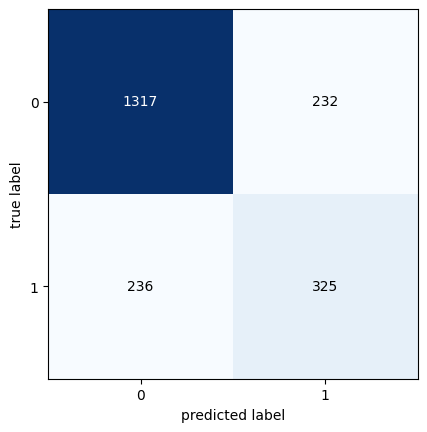

In [31]:
tree_pred = classifier.predict(X_test_prep)

tree_matrix = confusion_matrix(y_test_prep, tree_pred)
plot_confusion_matrix(tree_matrix)
print(classification_report(y_test_prep, tree_pred))

In [32]:
tree_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [34]:
tree_search = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_grid, cv=5, n_jobs=-1)
tree_search.fit(X_train_prep, y_train_prep)
tree_search.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [38]:
best_tree_model = tree_search.best_estimator_
tree_pred_best = best_tree_model.predict(X_test_prep)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1549
           1       0.65      0.39      0.49       561

    accuracy                           0.78      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.77      0.78      0.76      2110



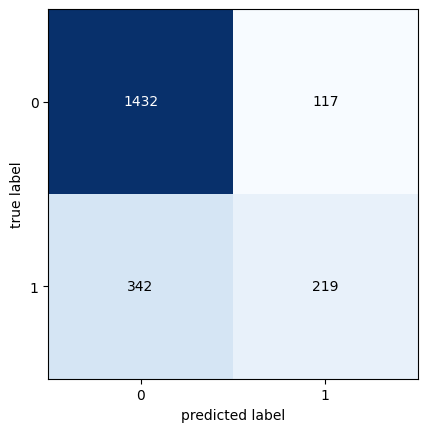

In [40]:
best_tree_matrix = confusion_matrix(y_test_prep, tree_pred_best)
plot_confusion_matrix(best_tree_matrix)

print(classification_report(y_test_prep, tree_pred_best))